In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../files/abc_clean.csv", index_col=0)
df.head()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,No,Unknown,2015.72,Unknown,6,3,Unknown,1,1,Male,NaN,3,5,Research Director,3,Unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.0,Yes
1,No,Unknown,2063.39,Unknown,1,4,Life Sciences,2,3,Male,NaN,2,5,Manager,3,Unknown,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,1971,199990.0,Yes
2,No,Rarely,1984.25,Research & Development,4,2,Technical Degree,3,3,Male,NaN,3,5,Manager,4,Married,NaN,41669.33,1,No,11,3.0,4,Unknown,0,22.0,3,3.0,22,11,15,1981,192320.0,Yes
3,No,Rarely,1771.40,Unknown,2,4,Medical,4,1,Female,NaN,3,4,Research Director,3,Married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,NaN,2,3.0,20,5,6,1976,171690.0,No
4,No,Unknown,1582.77,Unknown,3,3,Technical Degree,5,1,Female,NaN,4,4,Sales Executive,1,Divorced,12783.92,33238.20,2,No,12,3.0,4,Unknown,1,NaN,5,3.0,19,2,8,1977,NaN,No


In [7]:
correlacion = df.corr(numeric_only=True)

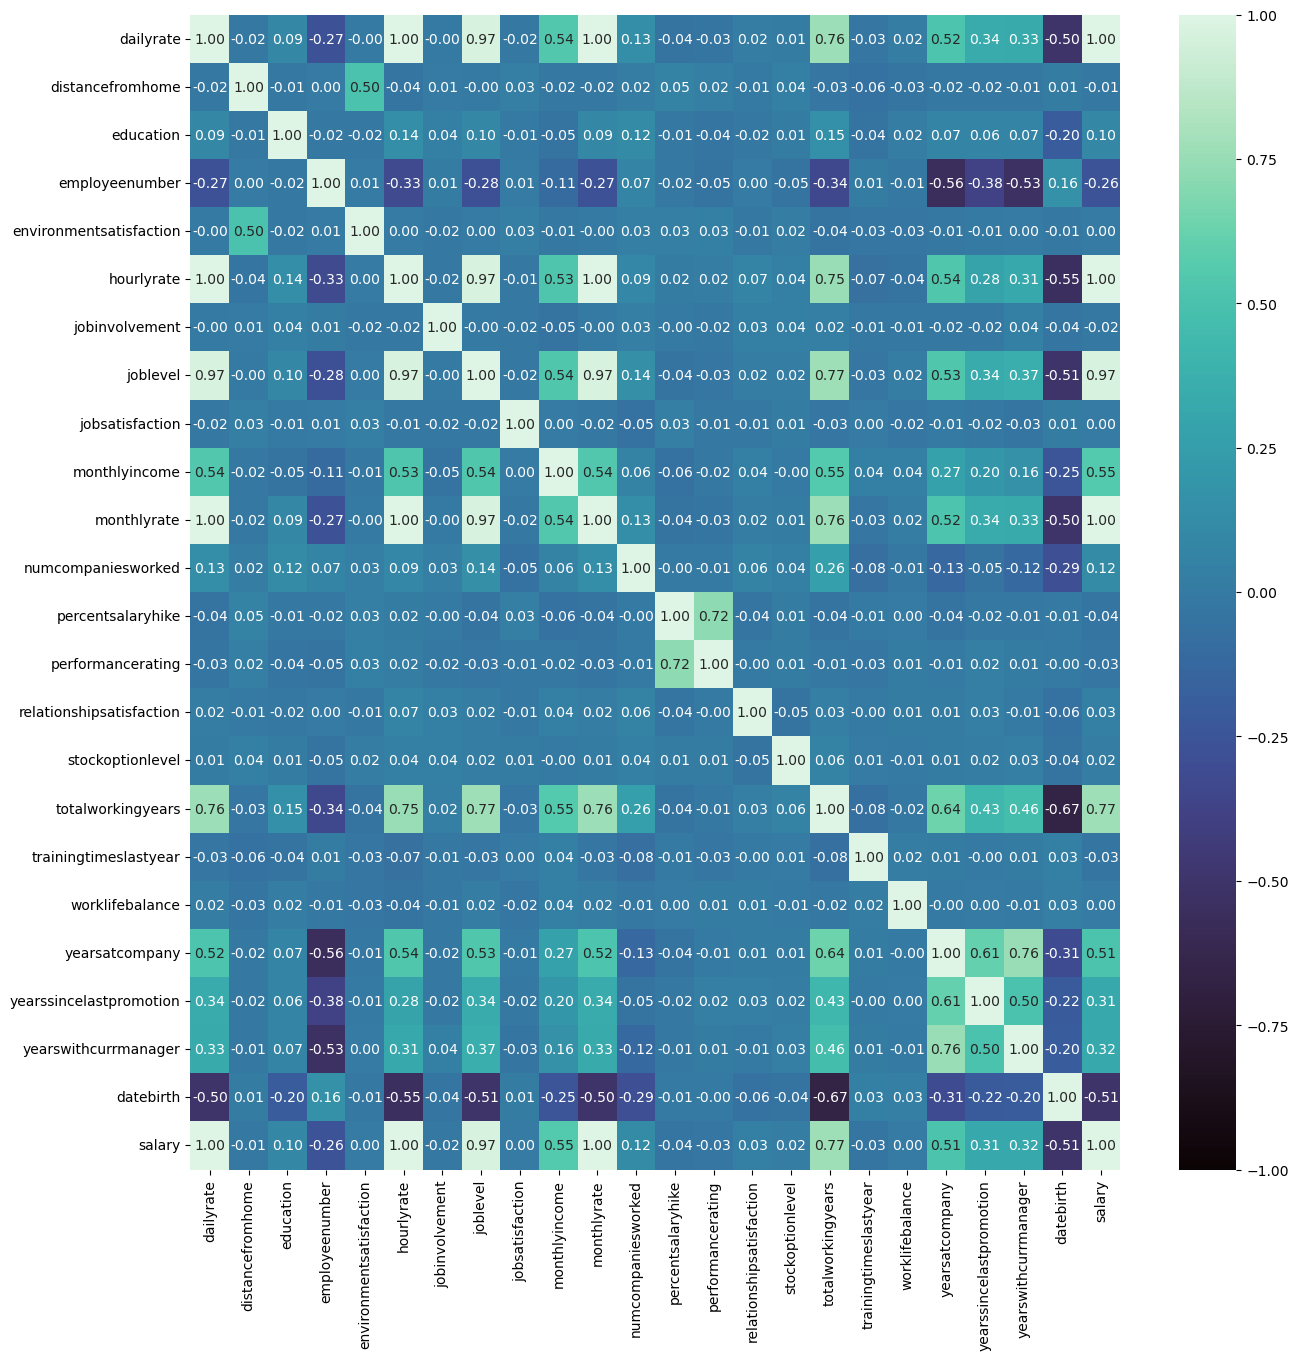

In [11]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara


# creamos un heatmap con la máscara
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1);

In [12]:
df.columns

Index(['attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth',
       'salary', 'remotework'],
      dtype='object')

### que cosas pueden influir en la satisfacción: ("jobsatisfaction")

Andrea:
- salary
- distancefromhome
- joblevel, department
- gender
- datebirth
- remotework
- bussinestravel
- education - jobrole 

Isa:
- standardhours
- yearsatcompany - yearsincurrentrole
- performancerating


#### Comparamos salario con satisfación del empleado, no encontramnos relación entre ambas. 

Establecemos un límite entre salario de 60.000 y 70.000, ya que todos cobran más de 60.000

In [46]:
df["attrition"].value_counts()

attrition
No     1355
Yes     259
Name: count, dtype: int64

<Axes: xlabel='jobsatisfaction', ylabel='salary'>

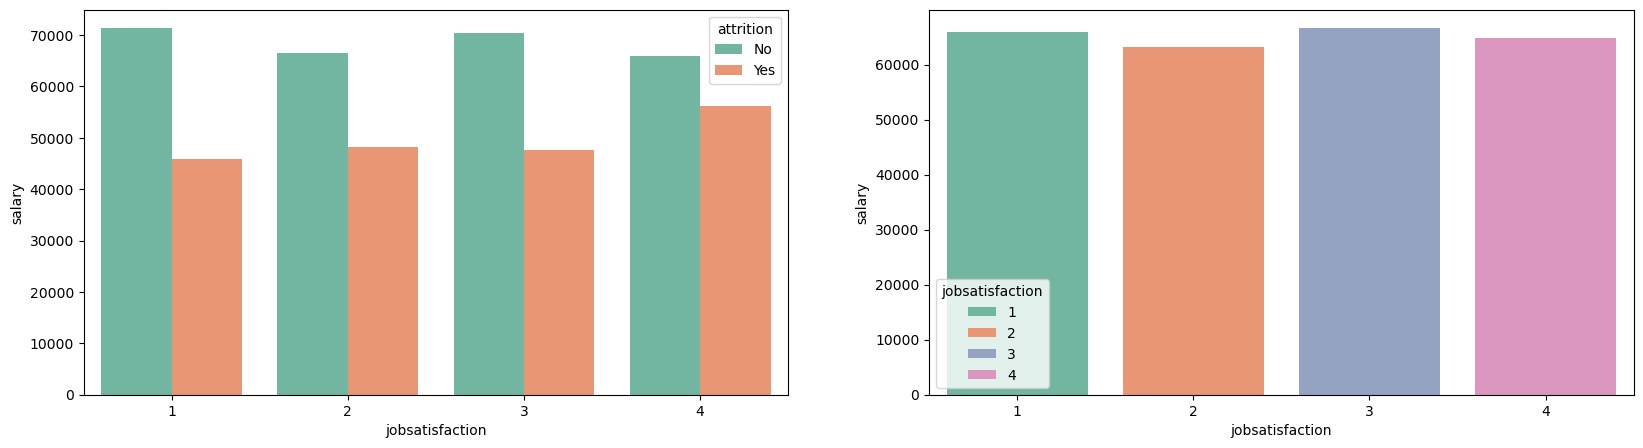

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[1])

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[0])


#### NO INCLUIMOS: Comparamos distancefromhome con satisfación del empleado, no encontramnos relación entre ambas. 

Establecemos un límite entre 8,12

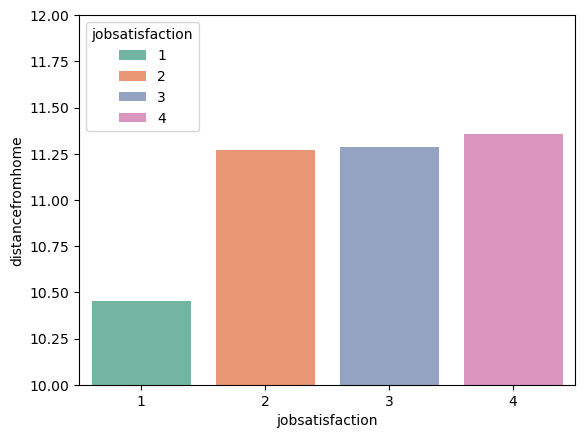

In [28]:
sns.barplot(y="distancefromhome", x="jobsatisfaction", data=df, errorbar=('ci', False), hue="jobsatisfaction", palette="Set2")
plt.ylim(8, 12);

#### NO INCLUIMOS: Comparamos joblevel, department con satisfación del empleado,

- No es relevante el nivel del puesto de trabajo con la satisfacción
- Por departamentos si se ve relacion, HHRR está menos satisfecho


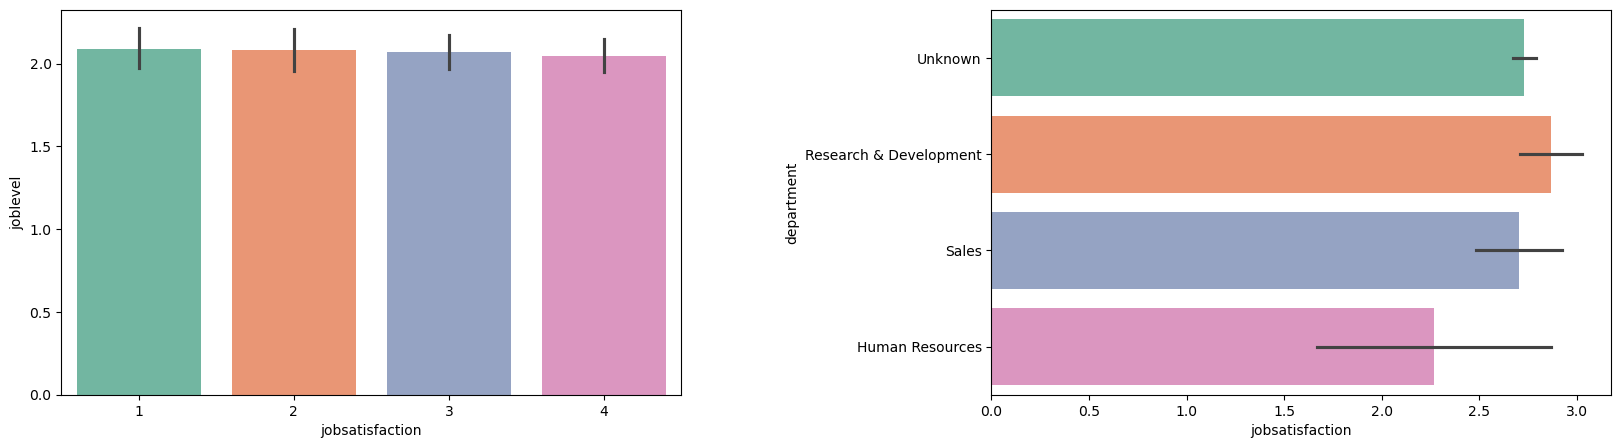

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(x="jobsatisfaction",
            y="joblevel", data=df,
            ax=axes[0], palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="department", data=df,
            ax=axes[1], palette="Set2")

plt.subplots_adjust(wspace=0.5)

### ("environmentsatisfaction")

- salary
- jobrole, joblevel, department
- gender

María:
- datebirth
- yearswithcurrentmanager
- yearssincelastpromotion
- yearsincurrentrole
- yearsatcompany

### para filtrar por las personas que siguen en la empresa ("attrition")
- 